**Dimension-Reduction-PCA**

In [1]:
# Importing the Libraries

# Importing libraries

import pandas as pd

In [3]:
# Loading the dataset

from google.colab import files

uploaded = files.upload()

Saving heart disease.csv to heart disease.csv


In [87]:
# Opening the csv file with the help of pandas

Hd1 = pd.read_csv("heart disease.csv")

In [88]:
#first we perform PCA
Hd = Hd1.drop(["age"], axis = 1)

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

# Considering only numerical data 
#uni.data = uni.iloc[:, 1:]


In [90]:
# Normalizing the numerical data 
Hd_normal = scale(Hd)
Hd_normal

array([[ 0.68100522,  1.97312292,  0.76395577, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [ 0.68100522,  1.00257707, -0.09273778, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.46841752,  0.03203122, -0.09273778, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 0.68100522, -0.93851463,  0.70684287, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.68100522, -0.93851463, -0.09273778, ...,  0.26508221,
         1.12302895, -1.09345881],
       [-1.46841752,  0.03203122, -0.09273778, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [91]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(Hd_normal)

In [92]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.24222524, 0.10712573, 0.09446941, 0.09246212, 0.07580434,
       0.07285902, 0.06477695, 0.05863887, 0.04790754, 0.04580257,
       0.04033504, 0.02920133, 0.02839185])

In [93]:
pca.components_
pca.components_[0]

array([ 0.15124946, -0.29726098,  0.12524218,  0.07246936,  0.04012187,
       -0.10714912, -0.36126953,  0.36040588,  0.38253599, -0.33787368,
        0.2559418 ,  0.24043745, -0.45881865])

In [94]:
# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 24.22,  34.93,  44.38,  53.63,  61.21,  68.5 ,  74.98,  80.84,
        85.63,  90.21,  94.24,  97.16, 100.  ])

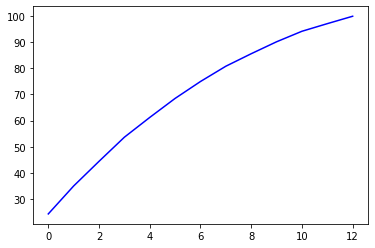

In [95]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "Blue")

In [96]:
# PCA scores
pca_values

array([[-0.39389159,  2.94999308,  0.10954325, ...,  0.28969449,
        -0.0944904 ,  0.35621619],
       [-0.30098049,  0.58395934, -0.91390823, ..., -0.25856522,
         0.09303627,  0.62851637],
       [-1.75235219,  0.41601189, -0.65850404, ..., -0.51922239,
         0.84499223, -0.63522028],
       ...,
       [ 2.36973797,  0.54740819,  1.59306935, ...,  0.93556166,
         0.97195203, -0.37783067],
       [ 2.27240192, -2.22241909,  0.05796224, ..., -0.17898972,
        -0.32266954,  0.13435827],
       [-0.47994783,  0.65674601, -0.39804908, ..., -0.08050143,
        -1.74797133, -0.65653454]])

In [97]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5","comp6", "comp7", "comp8", "comp9", "comp10", "comp11","comp12"
final = pd.concat([Hd1.age, pca_data.iloc[:, 0:10]], axis = 1)

In [98]:
final

,age,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9
0,63,-0.393892,2.949993,0.109543,-3.255118,0.889014,-1.410526,-0.006713,0.972660,0.950493,0.492643
1,37,-0.300980,0.583959,-0.913908,-2.384013,-1.965083,-0.290788,0.566134,0.707917,0.999332,1.928830
2,41,-1.752352,0.416012,-0.658504,0.182619,0.061341,-0.729914,0.293556,-0.729768,-1.235285,0.583640
3,56,-1.950862,-1.037437,0.245668,-0.122085,-0.389912,0.112155,-0.096802,0.024571,0.671473,0.815192
4,57,-0.882795,-0.141287,-1.834731,2.332287,0.240046,0.645678,-1.112396,0.783129,0.843914,0.535259
...,...,...,...,...,...,...,...,...,...,...,...
298,57,1.465790,-0.613795,-1.524621,0.697981,-0.067648,0.830339,-1.583658,-0.238481,-1.037844,-0.784174
299,45,0.162396,-0.772243,0.015844,-1.022326,-1.634477,0.067086,0.572174,1.545280,0.516761,-1.388591
300,68,2.369738,0.547408,1.593069,-1.654253,0.173728,1.744614,-0.029628,0.509340,-0.958449,1.114453
301,57,2.272402,-2.222419,0.057962,-1.211494,0.340311,0.503134,-0.814621,-0.696973,-0.933436,-0.709631


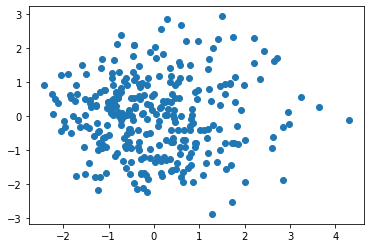

In [99]:
# Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x = final.comp1, y = final.comp2)